In [1]:
import numpy as np
import scipy.integrate as integrate
from scipy.integrate import quad, dblquad
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors
cmap = cm.Blues

The magnetic field of a line current is

$$\vec{B}=\frac{\mu_0 I}{4\pi}\int \frac{d\vec{l}' \times (\vec{r}-\vec{r}')}{|\vec{r}-\vec{r}'|^3} $$

In our situation we have

$$\vec{r}=x\hat{x}+y\hat{y}+z\hat{z} $$
$$\vec{r}'=R(\cos\phi \hat{x}+\sin\phi \hat{y}) $$
$$d\vec{l}'=Rd\phi \hat{\phi} = Rd\phi(-\sin\phi \hat{x}+ \cos\phi \hat{y}) $$

Plugging in all cross products yields

$$\vec{B}(x,y,z)=\frac{\mu_0 I}{4\pi} \int_0^{2\pi} \frac{[Rz\cos\phi] d\phi\hat{x}+[Rz\sin\phi] d\phi\hat{y}+[R^2-xR\cos\phi-yR\sin\phi]d\phi \hat{z}}{(R^2-2xR\cos\phi-2yR\sin\phi+x^2+z^2)^{3/2}} $$

However since we don't have values for the curent, a more useful quantity to plot would be

$$\frac{4\pi}{\mu_0 I} \vec{B}(x,z)=\int_0^{2\pi} \frac{[Rz\cos\phi] d\phi\hat{x}+[Rz\sin\phi] d\phi\hat{y}+[R^2-xR\cos\phi-yR\sin\phi]d\phi \hat{z}}{(R^2-2xR\cos\phi-2yR\sin\phi+x^2+z^2)^{3/2}} $$


In [2]:
R=0.1

Define the integrand

In [3]:
def integrand_x(phi, x,y,z):
    return (R*z*np.cos(phi))/(R**2-2*x*R*np.cos(phi)-2*R*y*np.sin(phi)+x**2+y**2+z**2)**(3/2)

def integrand_y(phi, x,y,z):
    return (R*z*np.sin(phi))/(R**2-2*x*R*np.cos(phi)-2*R*y*np.sin(phi)+x**2+y**2+z**2)**(3/2)

def integrand_z(phi, x,y,z):
    return (R**2-x*R*np.cos(phi)-y*R*np.sin(phi))/(R**2-2*x*R*np.cos(phi)-2*R*y*np.sin(phi)+x**2+y**2+z**2)**(3/2)

Define functions to get the magnitude and direction of the magnetic field.

In [4]:
def mag_field(x,y,z):
    x_comp = integrate.quad(integrand_x, 0, 2*np.pi, args=(x,y,z))[0]
    y_comp = integrate.quad(integrand_y, 0, 2*np.pi, args=(x,y,z))[0]
    z_comp = integrate.quad(integrand_z, 0, 2*np.pi, args=(x,y,z))[0]
    return np.array([x_comp, y_comp, z_comp])

def mag_magnitude(x,y,z):
     return np.sqrt(mag_field(x,y,z)[0]**2+mag_field(x,y,z)[1]**2+mag_field(x,y,z)[2]**2)
    
def mag_dir(x,y,z):
    return mag_field(x,y,z)/mag_magnitude(x,y,z)

Hackish way to get all points.

In [5]:
X_d, Z_d = np.meshgrid(np.linspace(-4*R, 4*R, 17), np.linspace(-4*R, 4*R, 17))
gridtuples = np.dstack((X_d, Z_d))

U_d = np.empty(X_d.shape)
V_d = np.empty(X_d.shape)
for i, row in enumerate(gridtuples):
    for j, ele in enumerate(gridtuples[i]):
        U_d[i,j]=mag_dir(ele[0], 0, ele[1])[0]
        V_d[i,j]=mag_dir(ele[0], 0, ele[1])[2]

X_m, Z_m = np.meshgrid(np.linspace(-4*R, 4*R, 177), np.linspace(-4*R, 4*R, 177))
gridtuples = np.dstack((X_m, Z_m))        

mag = np.empty(X_m.shape)
for i, row in enumerate(gridtuples):
    for j, ele in enumerate(gridtuples[i]):
        mag[i,j]=mag_magnitude(ele[0], 0, ele[1])

C:\Users\lukep\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\lukep\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
C:\Users\lukep\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
C:\Users\lukep\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:

Do the plot.

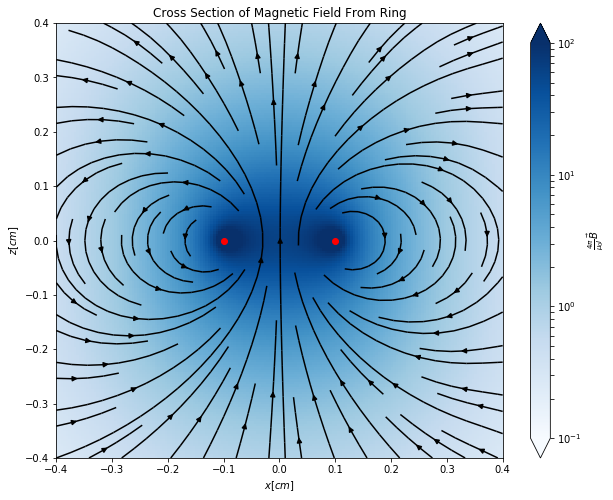

In [6]:
fig, ax = plt.subplots(figsize=(10,8))

cs1 = ax.pcolor(X_m, Z_m, mag, cmap=cmap, norm=colors.LogNorm(vmin=0.1, vmax=100))
cbar = fig.colorbar(cs1, ax=ax, extend='both', label=r'$\frac{4\pi}{\mu_0 I}\vec{B}$')

#Q = ax.quiver(X_d, Z_d, U_d, V_d, units='width', width=0.002)
Q = ax.streamplot(X_d, Z_d, U_d, V_d, color='k')

ax.scatter(np.array([-0.1, 0.1]), np.array([0,0]), color='r', label='Ring Location')

ax.set_title('Cross Section of Magnetic Field From Ring')
ax.set_xlabel('$x [cm]$')
ax.set_ylabel('$z [cm]$')

plt.show()

## Part B

We can parameterize the rotating loop of wire by

$$\vec{r}(u,v)=u\hat{x}+v\cos(\omega t)\hat{y}+(Z+v\sin(\omega t))\hat{z} $$

The flux is then given by $\vec{B} \cdot (\vec{r}_u \times \vec{r}_v)$ or

$$\text{Flux} = -\sin(wt)\vec{B} \cdot \hat{y}+\cos(\omega t) \vec{B} \cdot \vec{z} $$

and thus the total flux is given by

$$\Phi = \iint_{u^2+v^2<1} \vec{B} \cdot d\vec{A} $$

The EMF generated is thus $\mathcal{E}=-d\Phi/dt$ and since $\mathcal{E}=IR$ where $R$ is the resistance of the loop, we thus have

$$I=-\frac{1}{R}\frac{d \Phi}{dt} $$

In [7]:
def flux(u, v, t):
    [_, magfield_y, magfield_z] = mag_field(u,v*np.cos(t), Z+v*np.sin(t))
    return -np.sin(t)*magfield_y +np.cos(t)*magfield_z

def compute_flux(t):
    return dblquad(lambda A, B: flux(A*np.cos(B), A*np.sin(B), t), 0, 2*np.pi, 0, r_lit)

Physical Parameters:

In [8]:
Z = 0.12
t = 3*np.pi/2
r_lit = 0.05

Find the flux over an array of times ($t$ in the code is $\omega t$ in reality).

In [9]:
dt = 0.05
t = np.arange(0, 2*np.pi, 0.1)
f = np.array([compute_flux(i)[0] for i in t])

Below we plot the flux through the loop as a function of time. We also include a cosine approximation (we scale the cosine to be the same height as the flux curve). Interestingly, it provides a very accurate approximation (nut clearly it is not a perfect fit). 

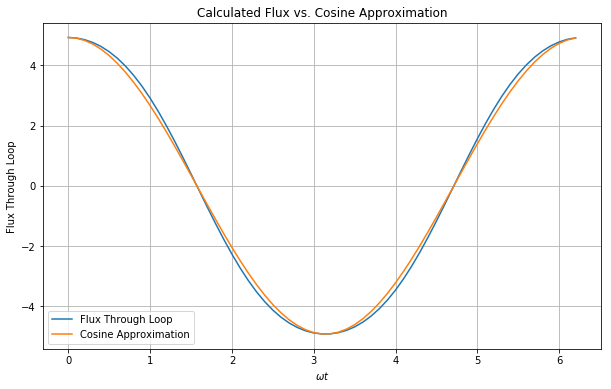

In [10]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(t,f, label='Flux Through Loop')
ax.plot(t,f.max()*np.cos(t), label='Cosine Approximation')

ax.set_xlabel('$\omega t$')
ax.set_ylabel('Flux Through Loop')
ax.set_title('Calculated Flux vs. Cosine Approximation')

ax.legend()

ax.grid()

plt.show()

The current through the loop is just the derivative of the flux.

In [15]:
I = -np.diff(f)/dt
t_diff = t[0:-1]+dt/2

Now we plot the expected current vs. a Sine approximation.

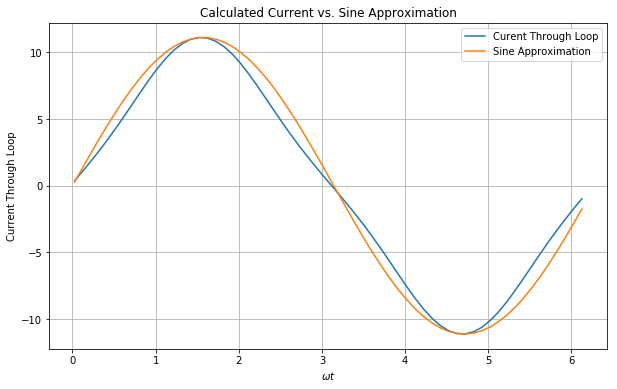

In [16]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(t_diff,I, label='Curent Through Loop')
ax.plot(t_diff,I.max()*np.sin(t_diff), label='Sine Approximation')

ax.set_xlabel('$\omega t$')
ax.set_ylabel('Current Through Loop')
ax.set_title('Calculated Current vs. Sine Approximation')

ax.legend()

ax.grid()

plt.show()